### Telecom Churn case study

In [1079]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [916]:
tele_data = pd.read_csv("telecom_churn_data.csv")

In [917]:
tele_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [918]:
tele_data.shape

(99999, 226)

In [919]:
tele_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [920]:
tele_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [921]:
tele_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

### Duplicate Check on the unique column

In [922]:
tele_data['mobile_number'].nunique()

99999

In [923]:
## There are no duplicates found

## 2. Null values check

In [924]:
round(100 * (tele_data.isnull().sum()/len(tele_data.index)),2).sort_values(ascending=False)

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_7                   74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_

In [925]:
temp = 100 * (tele_data.isnull().sum()/len(tele_data.index))

In [926]:
print('Total columns: ', len(temp))
print('Total columns that contain 50 < null values in it:', len(temp[temp > 50.0].sort_values(ascending=False)))

Total columns:  226
Total columns that contain 50 < null values in it: 40


In [927]:
# out of 226 cols there are 40 which are having 50%< rows null values. Lets take action

In [928]:
temp_df = pd.DataFrame(temp)
temp_df = temp_df.reset_index()
temp_df.head()

,index,0
0,mobile_number,0.00000
1,circle_id,0.00000
2,loc_og_t2o_mou,1.01801
3,std_og_t2o_mou,1.01801
4,loc_ic_t2o_mou,1.01801


In [929]:
temp_df.columns = ['Cols','Percentage_missing']
temp_df.head()

,Cols,Percentage_missing
0,mobile_number,0.00000
1,circle_id,0.00000
2,loc_og_t2o_mou,1.01801
3,std_og_t2o_mou,1.01801
4,loc_ic_t2o_mou,1.01801


In [930]:
temp_df[temp_df['Percentage_missing'] > 50]

,Cols,Percentage_missing
157,date_of_last_rech_data_6,74.846748
158,date_of_last_rech_data_7,74.428744
159,date_of_last_rech_data_8,73.660737
160,date_of_last_rech_data_9,74.077741
161,total_rech_data_6,74.846748
162,total_rech_data_7,74.428744
163,total_rech_data_8,73.660737
164,total_rech_data_9,74.077741
165,max_rech_data_6,74.846748
166,max_rech_data_7,74.428744


In [931]:
null_cols = list(temp_df[temp_df['Percentage_missing'] > 50].Cols)

In [932]:
tele_data[null_cols[:18]].describe(percentiles=[0.95,.98,.99])

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000
mean,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720
std,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
95%,8.000000,9.000000,8.000000,7.000000,252.000000,252.000000,252.000000,252.00000,7.000000,8.000000,8.000000,6.000000,2.000000,2.000000
98%,11.000000,12.000000,12.000000,10.000000,449.000000,449.000000,449.000000,348.00000,10.000000,11.000000,11.000000,8.000000,4.000000,4.000000
99%,14.000000,14.000000,14.000000,12.000000,505.000000,455.000000,455.000000,455.00000,12.000000,13.000000,13.000000,10.000000,5.000000,6.000000
max,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.00000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000


In [933]:
tele_data[null_cols[18:]].describe(percentiles=[0.95,.98,.99])

,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9
count,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000
mean,0.635711,0.659363,192.600982,200.981292,197.526489,192.734315,89.555057,89.384120,91.173849,100.264116,86.398003,85.914450,86.599478,93.712026,0.025086,0.023034,0.020844,0.015971,0.914404,0.908764,0.890808,0.860968
std,1.422827,1.411513,192.646318,196.791224,191.301305,188.400286,193.124653,195.893924,188.180936,216.291992,172.767523,176.379871,168.247852,171.384224,0.156391,0.150014,0.142863,0.125366,0.279772,0.287950,0.311885,0.345987
min,0.000000,0.000000,1.000000,0.500000,0.500000,1.000000,-30.820000,-26.040000,-24.490000,-71.090000,-35.830000,-15.480000,-55.830000,-45.740000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,154.000000,154.000000,154.000000,164.000000,0.480000,0.420000,0.880000,2.605000,10.830000,8.810000,9.270000,14.800000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
95%,2.000000,2.000000,504.000000,504.000000,504.000000,504.000000,427.128000,428.075000,426.924000,442.627500,423.988000,424.340000,423.210000,424.340000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
98%,4.000000,4.000000,715.920000,756.000000,755.000000,712.900000,650.582000,649.512000,649.181600,693.744000,601.135200,605.948000,601.170000,601.170000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
99%,6.000000,6.000000,907.000000,951.000000,951.000000,911.580000,850.991600,866.950000,848.690000,894.664300,778.000000,798.174000,778.000000,797.220000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,45.000000,49.000000,7546.000000,4365.000000,4076.000000,4061.000000,6362.280000,4980.900000,3716.900000,13884.310000,6433.760000,4809.360000,3483.170000,3467.170000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [934]:
# the min value for arpu column shows in negative, lets correct this.

tele_data = tele_data[(tele_data['arpu_6'] >= 0) & (tele_data['arpu_7'] >= 0) & (tele_data['arpu_8'] >= 0) & (tele_data['arpu_9'] >= 0)]

In [935]:
tele_data.shape

(97866, 226)

In [936]:
# the min value for arpu_7 column shows in negative, lets correct this.

#tele_data = tele_data[(tele_data['arpu_3g_6'] >= 0) & (tele_data['arpu_3g_7'] >= 0) & (tele_data['arpu_3g_8'] >= 0) & (tele_data['arpu_3g_9'] >= 0) & 
#                      (tele_data['arpu_2g_6'] >= 0) & (tele_data['arpu_2g_7'] >= 0) & (tele_data['arpu_2g_8'] >= 0) & (tele_data['arpu_2g_9'] >= 0)]

In [937]:
#doing the above step we are losing 90% of the data, so we are not going to do it.

In [938]:
#tele_data.shape

In [939]:
#checking if the corelation of null value is 100% between last recharge date and number of total recharge for data.
if tele_data['av_rech_amt_data_6'].isnull().equals(tele_data['total_rech_data_6'].isnull()):
    print("last recharge and total recharge for data are null on the same rows")

last recharge and total recharge for data are null on the same rows


In [940]:
# now we can impute 0.
# if the total recharge data is 0 then average recharge amount data also would be 0.

tele_data['total_rech_data_6'].fillna(0, inplace=True)
tele_data['av_rech_amt_data_6'].fillna(0, inplace=True)

In [941]:
if tele_data['date_of_last_rech_data_7'].isnull().equals(tele_data['total_rech_data_7'].isnull()):
    print("True for 7th Month")
    tele_data['total_rech_data_7'].fillna(0, inplace=True)
if tele_data['date_of_last_rech_data_8'].isnull().equals(tele_data['total_rech_data_8'].isnull()):
    print("True for 8th Month")
    tele_data['total_rech_data_8'].fillna(0, inplace=True)

True for 7th Month
True for 8th Month


In [942]:
# if the values are missing for many columns are equal to each other then, there are more chances that these will be for the
# same row. Lets check here

if tele_data['loc_ic_t2m_mou_6'].isnull().equals(tele_data['std_ic_t2o_mou_6'].isnull()):
    if tele_data['loc_ic_t2m_mou_6'].isnull().equals(tele_data['std_og_t2c_mou_6'].isnull()):
        if tele_data['loc_ic_t2m_mou_6'].isnull().equals(tele_data['og_others_6'].isnull()):
            if tele_data['loc_ic_t2m_mou_6'].isnull().equals(tele_data['std_og_t2t_mou_6'].isnull()):
                if tele_data['loc_ic_t2m_mou_6'].isnull().equals(tele_data['loc_ic_t2t_mou_6'].isnull()):
                    if tele_data['loc_ic_t2m_mou_6'].isnull().equals(tele_data['loc_og_mou_6'].isnull()):
                        if tele_data['loc_ic_t2m_mou_6'].isnull().equals(tele_data['loc_ic_t2f_mou_6'].isnull()):
                            if tele_data['loc_ic_t2m_mou_6'].isnull().equals(tele_data['loc_ic_mou_6'].isnull()):
                                if tele_data['loc_ic_t2m_mou_6'].isnull().equals(tele_data['std_ic_t2t_mou_6'].isnull()):
                                    if tele_data['loc_ic_t2m_mou_6'].isnull().equals(tele_data['std_ic_t2m_mou_6'].isnull()):
                                        if tele_data['loc_ic_t2m_mou_6'].isnull().equals(tele_data['std_ic_t2f_mou_6'].isnull()):
                                            if tele_data['loc_ic_t2m_mou_6'].isnull().equals(tele_data['std_og_t2m_mou_6'].isnull()):
                                                if tele_data['loc_ic_t2m_mou_6'].isnull().equals(tele_data['std_ic_mou_6'].isnull()):
                                                    if tele_data['loc_ic_t2m_mou_6'].isnull().equals(tele_data['loc_og_t2c_mou_6'].isnull()):
                                                        if tele_data['loc_ic_t2m_mou_6'].isnull().equals(tele_data['spl_ic_mou_6'].isnull()):
                                                            if tele_data['loc_ic_t2m_mou_6'].isnull().equals(tele_data['isd_ic_mou_6'].isnull()):
                                                                if tele_data['loc_ic_t2m_mou_6'].isnull().equals(tele_data['ic_others_6'].isnull()):
                                                                    if tele_data['loc_ic_t2m_mou_6'].isnull().equals(tele_data['loc_og_t2f_mou_6'].isnull()):
                                                                        if tele_data['loc_ic_t2m_mou_6'].isnull().equals(tele_data['loc_og_t2m_mou_6'].isnull()):
                                                                            if tele_data['loc_ic_t2m_mou_6'].isnull().equals(tele_data['loc_og_t2t_mou_6'].isnull()):
                                                                                if tele_data['loc_ic_t2m_mou_6'].isnull().equals(tele_data['roam_og_mou_6'].isnull()):
                                                                                    if tele_data['loc_ic_t2m_mou_6'].isnull().equals(tele_data['roam_ic_mou_6'].isnull()):
                                                                                        if tele_data['loc_ic_t2m_mou_6'].isnull().equals(tele_data['offnet_mou_6'].isnull()):
                                                                                            if tele_data['loc_ic_t2m_mou_6'].isnull().equals(tele_data['onnet_mou_6'].isnull()):
                                                                                                if tele_data['loc_ic_t2m_mou_6'].isnull().equals(tele_data['std_og_t2f_mou_6'].isnull()):
                                                                                                    print("Yes all Null values are same rows")
#,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,
#loc_ic_t2m_mou_6, std_ic_t2o_mou_6, std_og_t2c_mou_6, og_others_6,std_og_t2t_mou_6, loc_ic_t2t_mou_6,
#loc_og_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6
#std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6

#std_og_t2m_mou_6,loc_og_t2c_mou_6,spl_ic_mou_6,isd_ic_mou_6
#ic_others_6,loc_og_t2f_mou_6,loc_og_t2m_mou_6,loc_og_t2t_mou_6
#roam_og_mou_6,roam_ic_mou_6,offnet_mou_6,onnet_mou_6,std_og_t2f_mou_6]

Yes all Null values are same rows


In [943]:
#with the above logic we can actually conclude that all null value are same in these above columns.
#so we can treat the impute value as same.

nul_cols_6 = ['std_og_mou_6','isd_og_mou_6','spl_og_mou_6', 'loc_ic_t2m_mou_6', 'std_ic_t2o_mou_6', 'std_og_t2c_mou_6',
'og_others_6','std_og_t2t_mou_6', 'loc_ic_t2t_mou_6', 'loc_og_mou_6','loc_ic_t2f_mou_6','loc_ic_mou_6', 
'std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6','std_ic_mou_6', 'std_og_t2m_mou_6','loc_og_t2c_mou_6',
'spl_ic_mou_6','isd_ic_mou_6', 'ic_others_6','loc_og_t2f_mou_6','loc_og_t2m_mou_6','loc_og_t2t_mou_6',
'roam_og_mou_6','roam_ic_mou_6','offnet_mou_6','onnet_mou_6','std_og_t2f_mou_6']

In [944]:
#checking the same row null values in all the columns
for i in nul_cols_6:
    if not tele_data[i].isnull().equals(tele_data[nul_cols_6[0]].isnull()):
        print("something wrong with: ", i)

In [945]:
nul_cols_7 = ['std_og_mou_7','isd_og_mou_7','spl_og_mou_7', 'loc_ic_t2m_mou_7', 'std_ic_t2o_mou_7', 'std_og_t2c_mou_7',
'og_others_7','std_og_t2t_mou_7', 'loc_ic_t2t_mou_7', 'loc_og_mou_7','loc_ic_t2f_mou_7','loc_ic_mou_7', 
'std_ic_t2t_mou_7','std_ic_t2m_mou_7','std_ic_t2f_mou_7','std_ic_mou_7', 'std_og_t2m_mou_7','loc_og_t2c_mou_7',
'spl_ic_mou_7','isd_ic_mou_7', 'ic_others_7','loc_og_t2f_mou_7','loc_og_t2m_mou_7','loc_og_t2t_mou_7',
'roam_og_mou_7','roam_ic_mou_7','offnet_mou_7','onnet_mou_7','std_og_t2f_mou_7']


In [946]:
#checking the same row null values in all the columns
for i in nul_cols_7:
    if not tele_data[i].isnull().equals(tele_data[nul_cols_7[0]].isnull()):
        print("something wrong with: ", i)

In [947]:
nul_cols_8 = ['std_og_mou_8','isd_og_mou_8','spl_og_mou_8', 'loc_ic_t2m_mou_8', 'std_ic_t2o_mou_8', 'std_og_t2c_mou_8',
'og_others_8','std_og_t2t_mou_8', 'loc_ic_t2t_mou_8', 'loc_og_mou_8','loc_ic_t2f_mou_8','loc_ic_mou_8', 
'std_ic_t2t_mou_8','std_ic_t2m_mou_8','std_ic_t2f_mou_8','std_ic_mou_8', 'std_og_t2m_mou_8','loc_og_t2c_mou_8',
'spl_ic_mou_8','isd_ic_mou_8', 'ic_others_8','loc_og_t2f_mou_8','loc_og_t2m_mou_8','loc_og_t2t_mou_8',
'roam_og_mou_8','roam_ic_mou_8','offnet_mou_8','onnet_mou_8','std_og_t2f_mou_8']


In [948]:
#checking the same row null values in all the columns
for i in nul_cols_8:
    if not tele_data[i].isnull().equals(tele_data[nul_cols_8[0]].isnull()):
        print("something wrong with: ", i)

In [949]:
for i in nul_cols_6:
    tele_data[i].fillna(0, inplace=True)

In [950]:
for i in nul_cols_7:
    tele_data[i].fillna(0, inplace=True)

In [951]:
for i in nul_cols_8:
    tele_data[i].fillna(0, inplace=True)

In [952]:
(100 * tele_data.isnull().sum()/len(tele_data)).sort_values(ascending=False)[:40]

date_of_last_rech_data_6    74.708275
arpu_3g_6                   74.708275
count_rech_2g_6             74.708275
arpu_2g_6                   74.708275
night_pck_user_6            74.708275
max_rech_data_6             74.708275
fb_user_6                   74.708275
count_rech_3g_6             74.708275
count_rech_3g_7             74.201459
av_rech_amt_data_7          74.201459
arpu_3g_7                   74.201459
arpu_2g_7                   74.201459
date_of_last_rech_data_7    74.201459
fb_user_7                   74.201459
max_rech_data_7             74.201459
count_rech_2g_7             74.201459
night_pck_user_7            74.201459
night_pck_user_9            73.699753
arpu_3g_9                   73.699753
arpu_2g_9                   73.699753
date_of_last_rech_data_9    73.699753
total_rech_data_9           73.699753
av_rech_amt_data_9          73.699753
count_rech_3g_9             73.699753
count_rech_2g_9             73.699753
fb_user_9                   73.699753
max_rech_dat

In [953]:
tele_data.shape

(97866, 226)

In [954]:
(100 * tele_data[null_cols].isnull().sum()/len(tele_data)).sort_values(ascending=False)

date_of_last_rech_data_6    74.708275
night_pck_user_6            74.708275
count_rech_2g_6             74.708275
arpu_3g_6                   74.708275
arpu_2g_6                   74.708275
max_rech_data_6             74.708275
count_rech_3g_6             74.708275
fb_user_6                   74.708275
night_pck_user_7            74.201459
count_rech_3g_7             74.201459
date_of_last_rech_data_7    74.201459
max_rech_data_7             74.201459
arpu_3g_7                   74.201459
fb_user_7                   74.201459
count_rech_2g_7             74.201459
av_rech_amt_data_7          74.201459
arpu_2g_7                   74.201459
total_rech_data_9           73.699753
date_of_last_rech_data_9    73.699753
max_rech_data_9             73.699753
count_rech_2g_9             73.699753
fb_user_9                   73.699753
count_rech_3g_9             73.699753
arpu_3g_9                   73.699753
night_pck_user_9            73.699753
av_rech_amt_data_9          73.699753
arpu_2g_9   

In [955]:
tele_data[tele_data.filter(like='date',axis=1).columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97866 entries, 0 to 99998
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   last_date_of_month_6      97866 non-null  object
 1   last_date_of_month_7      97265 non-null  object
 2   last_date_of_month_8      96770 non-null  object
 3   last_date_of_month_9      96215 non-null  object
 4   date_of_last_rech_6       96341 non-null  object
 5   date_of_last_rech_7       96186 non-null  object
 6   date_of_last_rech_8       94551 non-null  object
 7   date_of_last_rech_9       93381 non-null  object
 8   date_of_last_rech_data_6  24752 non-null  object
 9   date_of_last_rech_data_7  25248 non-null  object
 10  date_of_last_rech_data_8  26108 non-null  object
 11  date_of_last_rech_data_9  25739 non-null  object
dtypes: object(12)
memory usage: 9.7+ MB


In [956]:
#These dates will not imputed with any values, better drop them.

In [957]:
tele_data = tele_data.drop(['date_of_last_rech_data_6' ,'date_of_last_rech_data_6' ,'date_of_last_rech_data_6' ,'date_of_last_rech_data_6'],axis=1)

In [958]:
tele_data.shape

(97866, 225)

In [965]:
(100* tele_data[tele_data.columns].isnull().sum()/len(tele_data)).sort_values(ascending=False)

fb_user_6                   74.708275
count_rech_2g_6             74.708275
night_pck_user_6            74.708275
count_rech_3g_6             74.708275
max_rech_data_6             74.708275
arpu_2g_6                   74.708275
arpu_3g_6                   74.708275
max_rech_data_7             74.201459
arpu_3g_7                   74.201459
av_rech_amt_data_7          74.201459
night_pck_user_7            74.201459
arpu_2g_7                   74.201459
fb_user_7                   74.201459
count_rech_3g_7             74.201459
count_rech_2g_7             74.201459
date_of_last_rech_data_7    74.201459
arpu_3g_9                   73.699753
arpu_2g_9                   73.699753
date_of_last_rech_data_9    73.699753
total_rech_data_9           73.699753
night_pck_user_9            73.699753
count_rech_3g_9             73.699753
count_rech_2g_9             73.699753
av_rech_amt_data_9          73.699753
max_rech_data_9             73.699753
fb_user_9                   73.699753
date_of_last

In [966]:
more_nul_cols = ['fb_user_6','count_rech_2g_6','night_pck_user_6','count_rech_3g_6','max_rech_data_6','arpu_2g_6','arpu_3g_6',
'max_rech_data_7','arpu_3g_7','av_rech_amt_data_7','night_pck_user_7','arpu_2g_7','fb_user_7','count_rech_3g_7',
'count_rech_2g_7','date_of_last_rech_data_7','arpu_3g_9','arpu_2g_9','date_of_last_rech_data_9','total_rech_data_9',
'night_pck_user_9','count_rech_3g_9','count_rech_2g_9','av_rech_amt_data_9','max_rech_data_9','fb_user_9',
'date_of_last_rech_data_8','night_pck_user_8','av_rech_amt_data_8','count_rech_3g_8','fb_user_8','arpu_3g_8',
'count_rech_2g_8','arpu_2g_8','max_rech_data_8']

In [968]:
(100 * tele_data[more_nul_cols].isnull().sum()/len(tele_data))

fb_user_6                   74.708275
count_rech_2g_6             74.708275
night_pck_user_6            74.708275
count_rech_3g_6             74.708275
max_rech_data_6             74.708275
arpu_2g_6                   74.708275
arpu_3g_6                   74.708275
max_rech_data_7             74.201459
arpu_3g_7                   74.201459
av_rech_amt_data_7          74.201459
night_pck_user_7            74.201459
arpu_2g_7                   74.201459
fb_user_7                   74.201459
count_rech_3g_7             74.201459
count_rech_2g_7             74.201459
date_of_last_rech_data_7    74.201459
arpu_3g_9                   73.699753
arpu_2g_9                   73.699753
date_of_last_rech_data_9    73.699753
total_rech_data_9           73.699753
night_pck_user_9            73.699753
count_rech_3g_9             73.699753
count_rech_2g_9             73.699753
av_rech_amt_data_9          73.699753
max_rech_data_9             73.699753
fb_user_9                   73.699753
date_of_last

In [969]:
tele_data[more_nul_cols].describe(percentiles=[.95,.98,.99])

,fb_user_6,count_rech_2g_6,night_pck_user_6,count_rech_3g_6,max_rech_data_6,arpu_2g_6,arpu_3g_6,max_rech_data_7,arpu_3g_7,av_rech_amt_data_7,night_pck_user_7,arpu_2g_7,fb_user_7,count_rech_3g_7,count_rech_2g_7,arpu_3g_9,arpu_2g_9,total_rech_data_9,night_pck_user_9,count_rech_3g_9,count_rech_2g_9,av_rech_amt_data_9,max_rech_data_9,fb_user_9,night_pck_user_8,av_rech_amt_data_8,count_rech_3g_8,fb_user_8,arpu_3g_8,count_rech_2g_8,arpu_2g_8,max_rech_data_8
count,24752.000000,24752.000000,24752.000000,24752.000000,24752.000000,24752.000000,24752.000000,25248.000000,25248.000000,25248.000000,25248.000000,25248.000000,25248.000000,25248.000000,25248.000000,25739.000000,25739.000000,25739.000000,25739.000000,25739.000000,25739.000000,25739.000000,25739.000000,25739.000000,26108.000000,26108.000000,26108.000000,26108.000000,26108.000000,26108.000000,26108.000000,26108.000000
mean,0.914229,1.867122,0.024968,0.597729,126.303935,86.300738,89.498382,126.644368,89.441433,201.308286,0.023170,85.974596,0.908824,0.620604,2.051925,100.258894,93.644712,2.443568,0.016046,0.658417,1.785151,192.779747,124.870741,0.860678,0.020913,197.676582,0.635476,0.891068,91.236292,2.020875,86.561395,125.693504
std,0.280031,2.572106,0.156030,1.268228,108.339162,173.155766,193.399617,109.341581,196.372794,197.114552,0.150447,176.712008,0.287864,1.379718,2.776193,216.523630,171.383470,2.518259,0.125654,1.410649,2.216819,188.414576,111.298654,0.346289,0.143096,191.509243,1.421398,0.311560,188.505321,2.726032,168.245152,109.404080
min,0.000000,0.000000,0.000000,0.000000,1.000000,-35.830000,-30.820000,1.000000,-26.040000,0.500000,0.000000,-15.480000,0.000000,0.000000,0.000000,-71.090000,-45.740000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.500000,0.000000,0.000000,-24.490000,0.000000,-55.830000,1.000000
50%,1.000000,1.000000,0.000000,0.000000,145.000000,10.700000,0.450000,145.000000,0.400000,154.000000,0.000000,8.810000,1.000000,0.000000,1.000000,2.590000,14.700000,2.000000,0.000000,0.000000,1.000000,164.000000,145.000000,1.000000,0.000000,154.000000,0.000000,1.000000,0.880000,1.000000,9.200000,145.000000
95%,1.000000,7.000000,0.000000,2.000000,252.000000,423.989000,427.394000,252.000000,428.679000,504.000000,0.000000,424.340000,1.000000,2.000000,8.000000,442.580000,424.340000,7.000000,0.000000,2.000000,6.000000,504.000000,252.000000,1.000000,0.000000,504.000000,2.000000,1.000000,426.829500,8.000000,422.287000,252.000000
98%,1.000000,10.000000,1.000000,4.000000,449.000000,601.170000,650.893800,449.000000,650.563000,756.000000,1.000000,609.512600,1.000000,4.000000,11.000000,692.984800,601.170000,10.000000,0.000000,4.000000,8.000000,711.200000,348.000000,1.000000,1.000000,755.000000,4.000000,1.000000,650.110800,11.000000,601.170000,449.000000
99%,1.000000,12.000000,1.000000,5.000000,455.000000,778.000000,852.746300,455.000000,867.203000,951.000000,1.000000,797.220000,1.000000,6.000000,13.000000,895.554800,796.224400,12.000000,1.000000,6.000000,10.000000,911.240000,455.000000,1.000000,1.000000,951.000000,6.000000,1.000000,848.699300,13.000000,778.000000,455.000000
max,1.000000,42.000000,1.000000,29.000000,1555.000000,6433.760000,6362.280000,1555.000000,4980.900000,4365.000000,1.000000,4809.360000,1.000000,34.000000,48.000000,13884.310000,3467.170000,84.000000,1.000000,49.000000,40.000000,4061.000000,1555.000000,1.000000,1.000000,4076.000000,45.000000,1.000000,3716.900000,44.000000,3483.170000,1555.000000


In [1007]:
tele_data1 = tele_data.copy()

In [1008]:
tele_data1.shape

(97866, 225)

In [1009]:
#tele_data1.filter(like='date', axis=1).columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9'],
      dtype='object')

In [ ]:
#tele_data1.drop(tele_data1.filter(like='date', axis=1).columns, axis=1)

#### Getting columns related to data service to impute, it might be the customer not have used the particular service, so assuming that we can impute the below columns to zero.

In [1010]:

cols_to_treat_mis = ['fb_user_6','fb_user_7','fb_user_8','fb_user_9',
                  'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_2g_9',
                  'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','count_rech_3g_9',
                  'night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9',
                  'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9',
                  'arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9']

In [1017]:
#'fb_user_6','fb_user_7','fb_user_8','fb_user_9'
# The above sequence is used to compare the null rows in each month columns

#June
for i in cols_to_treat_mis:
    if i.find('6') != -1:
        if not tele_data1[i].isnull().equals(tele_data1[cols_to_treat_mis[0]].isnull()):
            print('Null value for the row in ', i, ' is not matching to ', cols_to_treat_mis[0])

#July            
for i in cols_to_treat_mis:
    if i.find('7') != -1:
        if not tele_data1[i].isnull().equals(tele_data1[cols_to_treat_mis[1]].isnull()):
            print('Null value for the row in ', i, ' is not matching to ', cols_to_treat_mis[0])

#August            
for i in cols_to_treat_mis:
    if i.find('8') != -1:
        if not tele_data1[i].isnull().equals(tele_data1[cols_to_treat_mis[2]].isnull()):
            print('Null value for the row in ', i, ' is not matching to ', cols_to_treat_mis[0])
            
#September
for i in cols_to_treat_mis:
    if i.find('9') != -1:
        if not tele_data1[i].isnull().equals(tele_data1[cols_to_treat_mis[3]].isnull()):
            print('Null value for the row in ', i, ' is not matching to ', cols_to_treat_mis[0])

In [1018]:
(100 * tele_data1.isnull().sum()/len(tele_data1)).sort_values(ascending=False)

fb_user_6                   74.708275
count_rech_2g_6             74.708275
night_pck_user_6            74.708275
count_rech_3g_6             74.708275
max_rech_data_6             74.708275
arpu_2g_6                   74.708275
arpu_3g_6                   74.708275
max_rech_data_7             74.201459
arpu_3g_7                   74.201459
av_rech_amt_data_7          74.201459
night_pck_user_7            74.201459
arpu_2g_7                   74.201459
fb_user_7                   74.201459
count_rech_3g_7             74.201459
count_rech_2g_7             74.201459
date_of_last_rech_data_7    74.201459
arpu_3g_9                   73.699753
arpu_2g_9                   73.699753
date_of_last_rech_data_9    73.699753
total_rech_data_9           73.699753
night_pck_user_9            73.699753
count_rech_3g_9             73.699753
count_rech_2g_9             73.699753
av_rech_amt_data_9          73.699753
max_rech_data_9             73.699753
fb_user_9                   73.699753
date_of_last

#### As the % of missing values showing slight variation in each month of the data, we can impute 0 instead null to those columns

In [1019]:
for j in cols_to_treat_mis:
    tele_data1[j].fillna(0, inplace=True)

In [1020]:
tele_data1.shape

(97866, 225)

In [1021]:
(100 * tele_data1.isnull().sum()/len(tele_data1)).sort_values(ascending=False)

max_rech_data_6             74.708275
max_rech_data_7             74.201459
date_of_last_rech_data_7    74.201459
av_rech_amt_data_7          74.201459
total_rech_data_9           73.699753
date_of_last_rech_data_9    73.699753
max_rech_data_9             73.699753
av_rech_amt_data_9          73.699753
max_rech_data_8             73.322707
av_rech_amt_data_8          73.322707
date_of_last_rech_data_8    73.322707
std_og_t2t_mou_9            7.046370 
loc_og_t2m_mou_9            7.046370 
loc_og_mou_9                7.046370 
loc_og_t2c_mou_9            7.046370 
loc_ic_mou_9                7.046370 
std_og_t2m_mou_9            7.046370 
std_og_t2f_mou_9            7.046370 
std_og_t2c_mou_9            7.046370 
std_og_mou_9                7.046370 
ic_others_9                 7.046370 
isd_og_mou_9                7.046370 
isd_ic_mou_9                7.046370 
spl_og_mou_9                7.046370 
spl_ic_mou_9                7.046370 
og_others_9                 7.046370 
std_ic_mou_9

In [1025]:
tele_data1.rename(columns = {'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8',
                          'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

In [1027]:
tele_data1[cols_to_treat_mis].describe(percentiles=[.95,.98,.99])

,fb_user_6,fb_user_7,fb_user_8,fb_user_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9
count,97866.000000,97866.000000,97866.000000,97866.000000,97866.000000,97866.000000,97866.000000,97866.000000,97866.000000,97866.000000,97866.000000,97866.000000,97866.000000,97866.000000,97866.000000,97866.000000,97866.000000,97866.000000,97866.000000,97866.000000,97866.000000,97866.000000,97866.000000,97866.000000
mean,0.231224,0.234463,0.237713,0.226361,0.472227,0.529367,0.539115,0.469499,0.151176,0.160107,0.169528,0.173165,0.006315,0.005978,0.005579,0.004220,22.635685,23.074585,24.339373,26.368337,21.826946,22.180191,23.092237,24.628791
std,0.421618,0.423665,0.425684,0.418477,1.527055,1.671616,1.667707,1.382077,0.688687,0.751546,0.786102,0.779340,0.079215,0.077084,0.074485,0.064825,104.752953,107.142964,105.392396,119.491618,94.816924,97.318522,94.957029,97.080177
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-30.820000,-26.040000,-24.490000,-71.090000,-35.830000,-15.480000,-55.830000,-45.740000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
95%,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,153.142500,155.820000,192.960000,212.040000,151.110000,152.142500,173.742500,211.470000
98%,1.000000,1.000000,1.000000,1.000000,6.000000,6.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,305.013000,311.227000,331.242000,371.680000,262.077000,260.648000,289.850000,301.628000
99%,1.000000,1.000000,1.000000,1.000000,8.000000,9.000000,9.000000,7.000000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,462.625500,465.952500,477.321000,511.469000,424.340000,424.340000,424.350000,424.581500
max,1.000000,1.000000,1.000000,1.000000,42.000000,48.000000,44.000000,40.000000,29.000000,34.000000,45.000000,49.000000,1.000000,1.000000,1.000000,1.000000,6362.280000,4980.900000,3716.900000,13884.310000,6433.760000,4809.360000,3483.170000,3467.170000


In [1028]:
#now we can simply drop the null values

tele_data1.shape

(97866, 225)

In [1029]:
(100 * tele_data1.isnull().sum()/len(tele_data1)).sort_values(ascending=False)

max_rech_data_6             74.708275
max_rech_data_7             74.201459
date_of_last_rech_data_7    74.201459
av_rech_amt_data_7          74.201459
total_rech_data_9           73.699753
date_of_last_rech_data_9    73.699753
max_rech_data_9             73.699753
av_rech_amt_data_9          73.699753
max_rech_data_8             73.322707
av_rech_amt_data_8          73.322707
date_of_last_rech_data_8    73.322707
std_og_t2t_mou_9            7.046370 
loc_og_t2m_mou_9            7.046370 
loc_og_mou_9                7.046370 
loc_og_t2c_mou_9            7.046370 
loc_ic_mou_9                7.046370 
std_og_t2m_mou_9            7.046370 
std_og_t2f_mou_9            7.046370 
std_og_t2c_mou_9            7.046370 
std_og_mou_9                7.046370 
ic_others_9                 7.046370 
isd_og_mou_9                7.046370 
isd_ic_mou_9                7.046370 
spl_og_mou_9                7.046370 
spl_ic_mou_9                7.046370 
og_others_9                 7.046370 
std_ic_mou_9

## 3. Derive new features

In [1031]:
tele_data2 = tele_data1.copy()

In [1032]:
tele_data2.shape

(97866, 225)

In [359]:
#lets create few new variables which will be useful for us.

In [1045]:
#calculating total recharge amount for data

tele_data2['total_amt_rech_data_6'] = tele_data2['total_rech_data_6'] * tele_data2['av_rech_amt_data_6']
tele_data2['total_amt_rech_data_7'] = tele_data2['total_rech_data_7'] * tele_data2['av_rech_amt_data_7']
tele_data2['total_amt_rech_data_8'] = tele_data2['total_rech_data_8'] * tele_data2['av_rech_amt_data_8']
tele_data2['total_amt_rech_data_9'] = tele_data2['total_rech_data_9'] * tele_data2['av_rech_amt_data_9']

In [1046]:
tele_data2.filter(like='total', axis=1).columns

Index(['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_og_mou_9',
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_ic_mou_9',
       'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'total_rech_data_6',
       'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
       'total_amt_rech_data_6', 'total_amt_rech_data_7',
       'total_amt_rech_data_8', 'total_amt_rech_data_9'],
      dtype='object')

In [1055]:
tele_data2['avg_rech_amt_6_7'] =  tele_data2[['total_amt_rech_data_6', 'total_amt_rech_data_7', 'total_rech_amt_6', 'total_rech_amt_7']].mean(axis=1)

In [1056]:
print('Considering the high value customer to filter the cut off value: ', tele_data2['avg_rech_amt_6_7'].quantile(0.7))

Considering the high value customer to filter the cut off value:  290.0


In [1062]:
high_val_cust = tele_data2[tele_data2['avg_rech_amt_6_7'] >= 290]

In [1064]:
high_val_cust = high_val_cust.reset_index(drop=True)

In [1065]:
high_val_cust.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,total_amt_rech_data_6,total_amt_rech_data_7,total_amt_rech_data_8,total_amt_rech_data_9,avg_rech_amt_6_7
0,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.5,0.00,6.50,NaN,0.0,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,

In [1068]:
high_val_cust.shape

(29433, 230)

In [1211]:
tele_data2.shape

(97866, 230)

In [1212]:
tele_data3 = high_val_cust.copy()

## Create Target variable

In [1213]:
#creating target column for 9th month, - Total rechare amount = no of recharge * average amt of recharge

tele_data3['churned'] = '0'

In [1214]:
tele_data3['usage_9'] = tele_data3['total_og_mou_9'] + tele_data3['total_ic_mou_9'] + tele_data3['vol_2g_mb_9'] + tele_data3['vol_3g_mb_9']

In [1215]:
tele_data3['usage_9'].head()

0    0.00   
1    177.09 
2    590.30 
3    1284.14
4    583.78 
Name: usage_9, dtype: float64

In [1216]:
tele_data3['churned'] = tele_data3['usage_9'].apply(lambda x: 1 if x == 0 else 0)

In [1217]:
tele_data3['churned'].head()

0    1
1    0
2    0
3    0
4    0
Name: churned, dtype: int64

### Lets drop all the columns for 9th month as we have created the target column

In [1218]:
tele_data3.filter(like='_9', axis=1).columns

Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9',
       'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9',
       'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
       'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user

In [1219]:
tele_data3 = tele_data3.drop(tele_data3.filter(like='_9', axis=1).columns, axis=1)

In [1220]:
tele_data3.shape

(29433, 175)

In [1221]:
round(100 * tele_data3.isnull().sum()/len(tele_data3), 2).sort_values(ascending=False)[:20]

date_of_last_rech_data_8    50.90
av_rech_amt_data_8          50.90
max_rech_data_8             50.90
total_amt_rech_data_8       50.90
total_amt_rech_data_7       50.57
max_rech_data_7             50.57
av_rech_amt_data_7          50.57
date_of_last_rech_data_7    50.57
max_rech_data_6             48.53
date_of_last_rech_8         1.81 
last_date_of_month_8        0.59 
loc_ic_t2o_mou              0.58 
std_og_t2o_mou              0.58 
loc_og_t2o_mou              0.58 
date_of_last_rech_7         0.35 
date_of_last_rech_6         0.19 
last_date_of_month_7        0.12 
std_og_mou_7                0.00 
isd_og_mou_8                0.00 
isd_og_mou_7                0.00 
dtype: float64

In [1222]:
# We are dropping these date value, because we cant impute these fields

tele_data3 = tele_data3.drop(['date_of_last_rech_data_8', 'date_of_last_rech_data_7'], axis=1)
tele_data3.shape

(29433, 173)

In [1223]:
if tele_data3['av_rech_amt_data_8'].isnull().equals(tele_data3['total_amt_rech_data_8'].isnull()):
    pass
else:
    print('imputation not succes -1')
    
    
if tele_data3['max_rech_data_6'].isnull().equals(tele_data3['total_amt_rech_data_6'].isnull()):
    pass
else:
    print('imputation not succes -2')
    
    
if tele_data3['max_rech_data_7'].isnull().equals(tele_data3['total_amt_rech_data_7'].isnull()):
    pass
else:
    print('imputation not succes -3')
    
    
if tele_data3['max_rech_data_8'].isnull().equals(tele_data3['total_amt_rech_data_8'].isnull()):
    pass
else:
    print('imputation not succes -4')
    
    
if tele_data3['av_rech_amt_data_7'].isnull().equals(tele_data3['total_amt_rech_data_7'].isnull()):
    pass
else:
    print('imputation not succes -5')        

imputation not succes -2


In [1224]:
tele_data3['av_rech_amt_data_8'].fillna(0, inplace=True) 
tele_data3['total_amt_rech_data_8'].fillna(0, inplace=True)

#tele_data3['max_rech_data_6'].fillna(0, inplace=True)
tele_data3['max_rech_data_7'].fillna(0, inplace=True)
tele_data3['max_rech_data_8'].fillna(0, inplace=True)

tele_data3['av_rech_amt_data_7'].fillna(0, inplace=True)
tele_data3['total_amt_rech_data_7'].fillna(0, inplace=True)
    

In [1225]:
round(100 * tele_data3.isnull().sum()/len(tele_data3), 2).sort_values(ascending=False)[:20]

max_rech_data_6         48.53
date_of_last_rech_8     1.81 
last_date_of_month_8    0.59 
loc_og_t2o_mou          0.58 
std_og_t2o_mou          0.58 
loc_ic_t2o_mou          0.58 
date_of_last_rech_7     0.35 
date_of_last_rech_6     0.19 
last_date_of_month_7    0.12 
churned                 0.00 
og_others_7             0.00 
og_others_6             0.00 
spl_og_mou_8            0.00 
spl_og_mou_7            0.00 
spl_og_mou_6            0.00 
isd_og_mou_8            0.00 
std_og_mou_8            0.00 
isd_og_mou_7            0.00 
isd_og_mou_6            0.00 
total_og_mou_6          0.00 
dtype: float64

In [1226]:
tele_data3['max_rech_data_6'].fillna(0, inplace=True)

In [1227]:
round(100 * tele_data3.isnull().sum()/len(tele_data3), 2).sort_values(ascending=False)[:20]

date_of_last_rech_8     1.81
last_date_of_month_8    0.59
loc_og_t2o_mou          0.58
std_og_t2o_mou          0.58
loc_ic_t2o_mou          0.58
date_of_last_rech_7     0.35
date_of_last_rech_6     0.19
last_date_of_month_7    0.12
churned                 0.00
og_others_8             0.00
og_others_7             0.00
og_others_6             0.00
spl_og_mou_8            0.00
spl_og_mou_7            0.00
spl_og_mou_6            0.00
isd_og_mou_6            0.00
isd_og_mou_8            0.00
isd_og_mou_7            0.00
total_og_mou_7          0.00
std_og_mou_8            0.00
dtype: float64

In [1228]:
tele_data3 = tele_data3.dropna()

In [1229]:
tele_data3.shape

(28651, 173)

In [1230]:
# Delete all the date column

In [1231]:
tele_data3.filter(like='date').columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'],
      dtype='object')

In [1232]:
tele_data3 = tele_data3.drop(tele_data3.filter(like='date').columns, axis=1)

In [1233]:
# lets get all the total
tele_data3.shape

(28651, 167)

In [1234]:
sorted(tele_data3.columns)

['aon',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'avg_rech_amt_6_7',
 'churned',
 'circle_id',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2o_mou',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc

In [1235]:
# average revenue per user is captured in  'arpu_6' so we can drop prefixed 'arpu_' features.

In [1236]:
tele_data3 = tele_data3.drop(['arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',], axis=1)

In [1237]:
tele_data3.shape

(28651, 161)

In [1238]:
### Also in the same way we can drop columns which was added to the total to another column.

In [1239]:
to_be_droped = ['circle_id', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
 'count_rech_3g_8','vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8','std_og_mou_6',
 'std_og_mou_7', 'std_og_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2o_mou',
 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8','std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'std_ic_t2f_mou_6',
 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2o_mou',
 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',    'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8',
 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
 'loc_ic_t2o_mou', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'last_day_rch_amt_6','last_day_rch_amt_7',
 'last_day_rch_amt_8']
len(to_be_droped)

76

In [1240]:
tele_data4 = tele_data3.drop(to_be_droped, axis=1)
tele_data4.shape

(28651, 85)

In [1241]:
tele_data4.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28651 entries, 0 to 29432
Data columns (total 85 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   mobile_number          28651 non-null  int64  
 1   arpu_6                 28651 non-null  float64
 2   arpu_7                 28651 non-null  float64
 3   arpu_8                 28651 non-null  float64
 4   onnet_mou_6            28651 non-null  float64
 5   onnet_mou_7            28651 non-null  float64
 6   onnet_mou_8            28651 non-null  float64
 7   offnet_mou_6           28651 non-null  float64
 8   offnet_mou_7           28651 non-null  float64
 9   offnet_mou_8           28651 non-null  float64
 10  roam_ic_mou_6          28651 non-null  float64
 11  roam_ic_mou_7          28651 non-null  float64
 12  roam_ic_mou_8          28651 non-null  float64
 13  roam_og_mou_6          28651 non-null  float64
 14  roam_og_mou_7          28651 non-null  float64
 15  ro

In [1242]:
for i in tele_data4.columns:
    print('Unique values in ', i, ' is ' ,len(tele_data4[i].value_counts()))

Unique values in  mobile_number  is  28651
Unique values in  arpu_6  is  27977
Unique values in  arpu_7  is  28023
Unique values in  arpu_8  is  27375
Unique values in  onnet_mou_6  is  17051
Unique values in  onnet_mou_7  is  17142
Unique values in  onnet_mou_8  is  16100
Unique values in  offnet_mou_6  is  21005
Unique values in  offnet_mou_7  is  21127
Unique values in  offnet_mou_8  is  20136
Unique values in  roam_ic_mou_6  is  4014
Unique values in  roam_ic_mou_7  is  3388
Unique values in  roam_ic_mou_8  is  3455
Unique values in  roam_og_mou_6  is  4705
Unique values in  roam_og_mou_7  is  4019
Unique values in  roam_og_mou_8  is  4059
Unique values in  isd_og_mou_6  is  1006
Unique values in  isd_og_mou_7  is  1028
Unique values in  isd_og_mou_8  is  881
Unique values in  spl_og_mou_6  is  2991
Unique values in  spl_og_mou_7  is  3286
Unique values in  spl_og_mou_8  is  3161
Unique values in  og_others_6  is  839
Unique values in  og_others_7  is  107
Unique values in  og_othe

In [1249]:
for i in ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8']:
    print(i, ' values: ', tele_data4[i].value_counts())

monthly_2g_6  values:  0    24651
1    3444 
2    522  
3    28   
4    6    
Name: monthly_2g_6, dtype: int64
monthly_2g_7  values:  0    24729
1    3276 
2    607  
3    32   
4    5    
5    2    
Name: monthly_2g_7, dtype: int64
monthly_2g_8  values:  0    25085
1    3209 
2    319  
3    29   
4    7    
5    2    
Name: monthly_2g_8, dtype: int64
monthly_3g_6  values:  0     24636
1     2879 
2     782  
3     223  
4     74   
5     30   
6     10   
7     9    
8     3    
11    2    
9     2    
14    1    
Name: monthly_3g_6, dtype: int64
monthly_3g_7  values:  0     24677
1     2648 
2     944  
3     218  
4     73   
5     42   
6     25   
7     9    
8     5    
9     4    
11    2    
14    1    
12    1    
10    1    
16    1    
Name: monthly_3g_7, dtype: int64
monthly_3g_8  values:  0     24758
1     2722 
2     801  
3     219  
4     87   
5     32   
6     14   
7     9    
9     3    
8     3    
10    2    
16    1    
Name: monthly_3g_8, dtype: int64


In [1250]:
cat_cols = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

In [1251]:
tele_data4[cat_cols] = tele_data4[cat_cols].astype(int)

In [1252]:
tele_data4.shape

(28651, 85)

In [1255]:
num_cols = set(tele_data4.columns).difference(set(cat_cols))

In [1256]:
num_cols.remove('churned')

In [1258]:
len(num_cols)

78

<AxesSubplot:title={'center':'1 - Churned, 0 - not churned'}, ylabel='churned'>

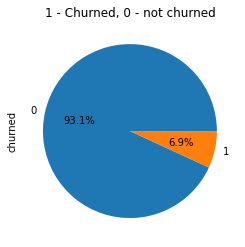

In [1263]:
tele_data4['churned'].value_counts().plot.pie(title='1 - Churned, 0 - not churned',autopct='%1.1f%%')